# MTH 9879 Market Microstructure Models, Spring 2015 

## Lecture 9: Optimal trading strategies: Almgren-Chriss

Tai-Ho Wang    
Department of Mathematics   
  
  
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BCCUNYstacked_BLK.jpg" align = "center" width=160></h2>  

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\cG}{\mathcal{G} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\underbar}{\underline}
$$

## Outline of Lecture 9

-   The Euler-Lagrange equation

-   The Hamilton-Jacobi-Bellman equation

-   The Almgren-Chriss optimal liquidation strategy

-   Dependence on dynamical assumptions: ABM vs GBM

-   Almgren (2005)

-   Optimal portfolio liquidation with a dark pool



### Overview of execution algorithm design

Typically, an execution algorithm has three layers:

-   The macrotrader

    -   This highest level layer decides how to slice the order: when
        the algorithm should trade, in what size and for roughly how
        long.


-   The microtrader

    -   Given a slice of the order to trade (a child order), this level
        decides whether to place market or limit orders and at what
        price level(s).


-   The smart order router

    -   Given a limit or market order, which venue should this order be
        sent to?

In this lecture, we are concerned with the highest level of the
algorithm: How to slice the order.



### Statement of the problem

-   <span> Given a model for the evolution of the stock price, we would
    like to find an optimal strategy for trading stock, the strategy
    that minimizes some cost function over all permissible strategies.
    </span>

    -   <span>We will specialize to the case of stock liquidation where
        the initial position $x_0=X$ and the final position
        $x_T=0$.</span>


-   <span>A <span>*static*</span> strategy is one determined in advance
    of trading.</span>


-   <span>A <span>*dynamic*</span> strategy is one that depends on the
    state of the market during execution of the order, *i.e.* on the
    stock price.</span>

    -   <span>Delta-hedging is an example of a dynamic strategy. VWAP is
        an example of a static strategy.</span>


-   It will turn out, surprisingly, that in many models, a
    statically optimal strategy is also dynamically optimal.



### The Euler-Lagrange equation

Suppose that the strategy $x_t$ minimizes the cost functional

$$\mathcal{C} [x,\dot x]=\int_0^T\,L(t,x_t,\dot x_t)\,dt$$ 

with boundary conditions $x_0=0$, $x_T=X$ (assume we are acquiring $X$ shares). 

Let $\varphi$ be a perturbation with $\varphi(0)=\varphi(T)=0$.
The first order criterion for optimal strategy (if there exists one) is

$$\left.\frac{d}{d\epsilon}\right|_{\epsilon=0}C[x+\epsilon\,\varphi,\dot x + \epsilon\,\dot \varphi]=0.$$



### The Euler-Lagrange equation

Computing this derivative explicitly (suppressing explicit dependence on
$t$),

\begin{eqnarray*}
\left.\frac{d}{d\epsilon}\right|_{\epsilon=0}C &=& \int_0^T\,\left\{\frac{\partial L}{\partial x}\,\varphi+\frac{\partial L}{\partial\dot x}\,\dot \varphi\right\}\,dt \\
&=& \int_0^T\,\left\{\frac{\partial L}{\partial x}\,\varphi - \int_0^T \frac{d}{dt}\frac{\partial L}{\partial\dot x}\,\dot \varphi\right\}\,dt + \left.\frac{\partial L}{\partial\dot x}\,\varphi\right|_{t=0}^T  \quad (\mbox{by applying integration by partys}) \\
&=& \int_0^T\,\left\{\frac{\partial L}{\partial x}-\frac{\partial}{\partial t}\frac{\partial L}{\partial\dot x}\right\}\,\varphi\,dt \quad (\mbox{since } \varphi(0) = \varphi(T) = 0)
\end{eqnarray*}

Since, this must hold for any perturbation $\varphi$ with
$\varphi(0)=\varphi(T)=0$, we deduce

<font color="blue">
####<span>The Euler-Lagrange equation</span>
$$\frac{\partial}{\partial t}\,\left(\frac{\partial L}{\partial {\dot x} }\right)-\frac{\partial L}{\partial {x} }=0$$



### Stochastic control problem

A stochastic control problem is a control problem which aims to minimize certain expected costs among all admissible controls. <br>
Specifically, consider

$$
  \max_{v\in\mathcal G[0,T]} \E\left[g(X^{(v)}_T) + \int_0^T h(s,X^{(v)}_s,v_s) ds \right]
$$

where

* $g$ is referred to as the *terminal cost* and $h$ is the *running cost*


* the state variable $X^{(v)}_t$ is driven by the controlled SDE

    $$
      dX^{(v)}_t = \mu( t,X^{(v)}_t, v_t) dt + \sigma(t,X^{(v)}_t, v_t) dW_t.
    $$
    

* $\mathcal G[0,T]$ is the collection of admissible controls in the time interval $[0,T]$ 

### Bellman’s principle of optimality

“An optimal policy has the property that whatever the initial state and
initial decision are, the remaining decisions must constitute an optimal
policy with regard to the state resulting from the first decision.”

(See Bellman, 1957, Chap. III.3.)



### Value function 

* For a given admissible control $v\in\mathcal G[t,T]$, define the expected objective functional $J^{(v)}$ as
    
    $$
      J^{(v)}(t,x) = \E\left[\left. g(X^{(v)}_T) + \int_0^T h(s,X^{(v)}_s,v_s) ds \right| X_t = x \right].
    $$


* The value function $J(t,x)$ for a stochastic control problem is defined as

    $$
      J(t,x) = \max_{v\in\mathcal G[t,T]} J^{(v)}(t,x).
    $$


* The value function $J$ at $(t,x)$ is the optimal value of the control problem conditioned on the process starting at $(t,x)$ and applying the optimal control thereafter.

### Bellman's principle again

The Bellman's principle can be rephrased in terms of value function as follow. For any $0 < \epsilon < T -t$,

$$
J(t,x) = \max_{v\in\cG[t,t+\epsilon]} \E\left[\left. \int_t^{t+\epsilon} h(s,X^{(v)}_s,v_s) ds + J(t+\epsilon,X^{(v)}_{t+\epsilon}) \right| \cF_t \right].
$$


### The Hamilton-Jacobi-Bellman (HJB) equation

The value function $J$ satisfies the terminal value problem

$$
\p_t J(t,x) + \max_{v\in\cG[t]} \{\mathcal L^{(v)} J(t,x) + h(t,x,v) \} = 0, \mbox{ for } t < T
$$

with terminal condition

$$
  J(T,x) = g(x),
$$

where $\mathcal L^{(v)} := \frac{\sigma^2}2 \p_x^2 + \mu \p_x$ is the associated infinitesimal generator of the controlled process 

$$
dX^{(v)}_t = \mu( t,X^{(v)}_t, v_t) dt + \sigma(t,X^{(v)}_t, v_t) dW_t.
$$

#### Note

* The HJB equation is bascially an infinitesimal version of the Bellman's principle. 

* The optimal policy (control) is given implicitly in terms of the value function $J$.


### Deterministic and stochastic optimal control

-   <span>In <span>*deterministic*</span> optimal control, the evolution
    of the state vector is deterministic.</span>

-   <span>In <span>*stochastic*</span> optimal control, the evolution of
    the state vector is stochastic.</span>

### Almgren and Chriss

-   The seminal paper of [Almgren and Chriss]<sup id="cite_ref-AlmgrenChriss" class="reference"><a href="#cite_note-AlmgrenChriss"><span>[</span>2<span>]</span></a></sup> treats the execution of a meta
    order as a tradeoff between risk and execution cost.

-   According to their formulation:

    -   The faster an order is executed, the higher the execution cost

    -   The faster an order is executed, the lower the risk (which is
        increasing in position size).

-   Note that this is inconsistent with the empirical success of the
    square-root formula in describing the cost of meta orders.



### Almgren and Chriss

For simplicity, we consider liquidation of an existing position $X$.
Denote the position at time $t$ by $x_t$ with $x_0=X$ and $x_T=0$.

[Almgren and Chriss]<sup id="cite_ref-AlmgrenChriss" class="reference"><a href="#cite_note-AlmgrenChriss"><span>[</span>2<span>]</span></a></sup> model market impact and slippage as follows. The stock
price $S_t$ evolves as 

$$dS_t=\gamma\,dx_t+\sigma\,dZ_t$$

and the price
$\tilde S_t$ at which transactions occur is given by

$$\tilde S_t = S_t - \eta\,v_t$$

where $v_t:=-{\dot x}_t$ is the rate of
trading.



### Price path in the Almgren and Chriss model

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/AlmgrenChriss.png" align = "center" width=500></h2>
Figure 1: The Almgren and Chriss price path is plotted in orange.

### Consistency with empirical observation

-   This price path is inconsistent with empirical observation:

    -   The average price path during execution is linear.

    -   There is no price reversion after completion of the order.



### P&L and cost of trading of a trading strategy

Let $x_t$ be a trading strategy. The corresponding P&L (up to time $t$), denoted by $\Pi_t(x)$, is identified as 

$$
\Pi_t(x) := x_t (S_t - S_0) + \int_0^t (S_0 - \tilde S_\tau) d x_\tau.
$$

- The first term represents the potential cost of shares that are yet to be transacted.

- The second term corresponds to the monetary value from the shares that have been transacted up to time $t$.

- Obviously, should there be no trade in the time interval $[0,t]$, i.e., $x_s = X$ for all $s \in [0,t]$, the P&L reads $\Pi_t(x) = X (S_t - S_0)$; reflecting the P&L from the price movement of the stock.

#### <font color=blue>Implementation shortfall as cost of trading </font>

Negative P&L is also referred to as the *implementation shortfall*, which will be used as the cost of trading, denoted by $C$ hereafter.



### P&L in Almgren-Chriss model

Note that, at the end of execution period $T$, the P&L reads
$$
  \Pi_T(x) = x_T (S_T - S_0) + \int_0^T (S_0 - \tilde S_u) d x_u,
$$
should there be $x_T$ shares yet to be transacted. Hence, in Almgren-Chriss model 

\begin{eqnarray*}
\Pi_T(x) &=& x_T (S_T - S_0) + \int_0^T (S_0 - \tilde S_u) d x_u \\
&=& \int_0^T [- \gamma (x_u - X) - \sigma W_u + \eta v_u] d x_u \quad (\mbox{note that } x_T = 0) \\
&=& -\frac\gamma2 X^2 + \sigma \int_0^T x_u d W_u - \eta \int_0^T v_u^2 du \quad (\mbox{Integration by parts}).
\end{eqnarray*}
Therefore, the expected cost corresponding to the trading strategy $x$ is given by  
\begin{eqnarray*}
&& \E\left[C_T(x)\right] = \frac\gamma2 X^2 + \eta \int_0^T \Eof{v_u^2} du.
\end{eqnarray*}

### An observation from Predoiu, Shaikhet and Shreve

Suppose the cost associated with a strategy depends on the stock price
only through the term 

$$\int_0^T\,S_t\,dx_t.$$

with $S_t$ a martingale.
Integration by parts gives

$$\mathbb{E} \left[\int_0^T\,S_t\,dx_t\right]=\mathbb{E} \left[S_T\,x_T-S_0\,x_0-\int_0^T\,x_t\,dS_t\right]=-S_0\,X$$

which is independent of the trading strategy and we may proceed as if
$S_t=0$.

<font color="red">
####<span>Quote from [Predoiu, Shaikhet, and Shreve]<sup id="cite_ref-PredoiuShaikhetShreve" class="reference"><a href="#cite_note-PredoiuShaikhetShreve"><span>[</span>9<span>]</span></a></sup></span>
<span>“...there is no
longer a source of randomness in the problem. Consequently, without loss
of generality we may restrict the search for an optimal strategy to
nonrandom functions of time”.</span>



### Corollary

-   <span>This observation enables us to easily determine whether or not
    a statically optimal strategy will be dynamically optimal.</span>

    -   <span>In particular, if the price process is of the form
        $$S_t=S_0+\text{ impact of prior trading} +\text {noise},$$ and
        if there is no risk term, a statically optimal strategy will be
        dynamically optimal.</span>

    -   <span>If there is a risk term independent of the current stock
        price, a statically optimal strategy will again be dynamically
        optimal.</span>



### Expected cost of VWAP in the Almgren and Chriss model

For a VWAP, $v_t=X/T$ where $X$ is the total trade size and $T$ is the
duration of the order.

\begin{eqnarray*}
\E[C_T(x)] &=& \E\left[\frac\gamma2 X^2 - \sigma \int_0^T x_u d W_u + \eta \int_0^T \left(\frac XT\right)^2 du \right] \\
&=& \frac\gamma2 X^2 + \eta \frac{X^2}T \\
&=& \left(\frac\gamma2 + \frac\eta{T}\right)X^2.
\end{eqnarray*}

The cost per share of executing an order using VWAP is therefore

$$\hat{C}=\left(\frac\gamma2 + \frac\eta{T}\right)X$$

which is linear in the trade
size $X$ and inversely proportional to the duration of the order.



### The optimal strategy of a risk neutral trader

For a risk neutral trader whose objective is to minimize his total cost, the optimal control problem reads 

\begin{eqnarray*}
&& \min_{v} \E\left[C_T(x)\right] \\
&=& \min_{v} \left\{\frac\gamma2 X^2 + \eta \int_0^T \Eof{v_u^2} du \right\} \\
&=& \frac\gamma2 X^2 + \eta \min_v \int_0^T \Eof{v_u^2} du,
\end{eqnarray*}

where the state variable $x_t$ is driven by $dx_t = -v_t dt$ with the constraints $x_0 = X$ and $x_T = 0$.   
Note that, since $S_t$ is not involved in the last expression, we end up with a deterministic control problem which can be solved by the solution to its assocated HJB equation or, due to the simplicity of the dynamics of $x_t$, further reduced to a variational problem. 

### Variational problem 

$$\min_v \int_0^T\,v_t^2\,dt$$

with $v_t=-\dot x_t$ and $x_0 = X$, $x_T = 0$. 

The Euler-Lagrange equation is then

$$\partial_t v_t=-\partial_{t,t} x_t=0$$

with boundary conditions
$x_0=X$ and $x_T=0$ and the solution is obviously

$$v_t=\frac{X}{T};\, x_t=X\,\left(1-\frac{t}{T}\right)$$

### Adding a risk term

[Almgren and Chriss]<sup id="cite_ref-AlmgrenChriss" class="reference"><a href="#cite_note-AlmgrenChriss"><span>[</span>2<span>]</span></a></sup> add a risk term that penalizes the approximate variance
of the trading cost. They claim 

$$Var \left[\int_0^T\,x_t\,dS_t\right] \approx \sigma^2\,\int_0^T\,x_t^2\,dt$$

In fact, by It&ocirc;'s isomety, it is an equality if $x_t$ is deterministic. 

The expected risk-adjusted cost is then given by (temporarily ignore the path independent term $\frac\gamma2 X^2$)

$$\eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$$

for some price of risk $\lambda$.

-   <span>Note the analogies to physics and portfolio theory.</span>

    -   <span>The first term looks like kinetic energy and the second
        term like potential energy.</span>

    -   <span>The expression looks like the objective in mean-variance
        portfolio optimization.</span>

The Euler-Lagrange equation becomes $$\ddot x- \kappa^2\,x=0$$ with
$$\kappa^2=\frac{\lambda\,\sigma^2}{\eta}$$ The solution is a linear
combination of terms of the form $e^{\pm \kappa t}$ that satisfies the
boundary conditions $x_0=X$, $x_T=0$. The solution is then

<font color="red">
<span>Almgren-Chriss optimal strategy</span>

<a name="eq:optimalAC"></a>(2)
$$x(t)=X\,\frac{\sinh \kappa (T-t)}{\sinh \kappa T}$$



<font color="black">
Once again, this statically optimal solution is dynamically optimal.

### Efficient frontier in the Almgren Chriss model

In [1]:
%load_ext rpy2.ipython

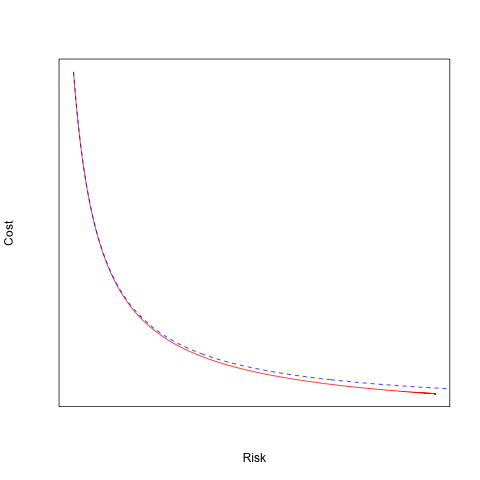

In [2]:
%%R

#-------------------------------------------------
# Figure 2: Almgren-Chriss Efficient frontier plot
costOpt <- function(kappa,T){1/4*kappa*(1/sinh(kappa*T))^2*(2*kappa*T + sinh(2*kappa*T))}
riskOpt <- function(kappa,T){1/4*kappa*(1/sinh(kappa*T))^2*(-2*kappa*T + sinh(2*kappa*T))}

costVWAP <- function(kappa,T){1/T}
riskVWAP <- function(kappa,T){kappa^2*T/3}

tt <- (20:1000)/200
rOpt <- riskOpt(1,tt);
cOpt <- costOpt(1,tt);
rVWAP <- riskVWAP(1,tt);
cVWAP <- costVWAP(1,tt);
plot(rOpt,cOpt,type="l",col="red",xlab="Risk",ylab="Cost",xaxt="n",yaxt="n");
points(rVWAP,cVWAP,type="l",col="blue",lty=2);

Figure 2: The optimal strategy [(2)](#eq:optimalAC) is in red and VWAP in blue.

### Deterministic control problem

The problem of minimizaing expected risk-adjusted cost can be recast as the following deterministic (since $S_t$ is not involved) control problem 

$$\min_v \left\{\eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt \right\}$$

with state vairable $x_t$ driven by $dx_t = -v_t dt$ and $x_0 = X$. Similar to the stochastic case, the value function $J$ is defined by

$$
J(t,x) = \min_{v\in\mathcal G[t,T]} \left\{\eta\,\int_t^T\,{\dot x}_t^2\,dt + \lambda\,\sigma^2\,\int_t^T\,x_t^2\,dt \right\}
$$

with $x_t = x$.


### The HJB equation

The HJB equation reads

<a name="eq:HJB1"></a>(3)
$$\frac{\partial J}{\partial t} + \lambda\,\sigma^2\,x^2 + \min_{v \in \mathcal{G}}\left\{-v J_x + \eta\,v^2\right\}=0.$$

The optimal choice of $v$ is $$v^* = \frac{J_x}{2\eta}.$$
Substituting back into [(3)](#eq:HJB1) gives

<a name="eq:HJB2"></a>(4)
$$\frac{\partial J}{\partial t} + \lambda \sigma^2 x^2 - \frac{J_x^2}{4\eta} = 0$$

which we solve by imposing the ansatz $J(t,x) = a(t) x^2$.

#### Remark
To take into account the terminal condition that $x_T = 0$, we set the terminal condition for the HJB equation as 

$$\lim_{t\uparrow T}J(t,x)=\begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

### Solution to HJB equation 

By substituting the ansatz $J(t,x) = a(t)x^2$ into the HJB equation [(4)](#eq:HJB2), we obtain 

$$
a' x^2 + \lambda \sigma^2 x^2 - \frac{(2ax)^2}{4\eta} = 0. 
$$

Setting the coefficient of $x^2$ equal to zero yields the ODE for $a$:

$$
a' + \lambda \sigma^2 - \frac{a^2}\eta = 0.
$$

Taking into account the terminal condition, we obtain the unique solution for $a$ as

$$
a(t) = \kappa \eta \coth(\kappa(T-t)).
$$

### Optimal strategy

The optimal trading rate $v^*$ is obtained via the value function $J$ as

$$
v_t^* = \frac{J_x}{2\eta} = \frac{a(t)}{\eta} x^*_t = \kappa \coth(\kappa(T-t)) x_t^*.
$$

Finally, recall that $v_t = -\dot x_t$, by solving the ODE 

$$
-\dot x_t = \kappa \coth(\kappa(T-t)) x_t
$$

with initial conditional $x_0 = X$, we obtain the Almgren-Chriss solution 

$$
x_t^* = X \frac{\sinh \kappa (T-t)}{\sinh \kappa T}.
$$

### What happens if we change the risk term?

Suppose we penalize average VaR instead of variance. This choice of risk
term has the particular benefit of being linear in the position size.
The expected risk-adjusted cost is then given by

$$C = \eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma\,\int_0^T\,x_t\,dt$$

for some price of risk $\lambda$.

The Euler-Lagrange equation becomes 

$$\ddot x- A=0$$

with

$$A=\frac{\lambda\,\sigma}{2\,\eta}$$

The solution is a quadratic of the form $A\,t^2/2+B \,t + C$ that
satisfies the boundary conditions $x_0=X$, $x_T=0$. The solution is then

<a name="eq:VaRgeneral"></a>(5)
$$x(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right)$$

In contrast to the previous case where the cost function is monotonic
decreasing in the trading rate and the optimal choice of liquidation
time is $\infty$, in this case, we can compute an optimal liquidation
time.

When $T$ is optimal, we have
$$\frac{\partial C}{\partial T}\propto {\dot x}_T^2 + A\,x_T=0$$ from
which we deduce that $\dot x_T=0$.

Substituting into [(5)](#eq:VaRgeneral) and solving for the optimal time
$T^\star$ gives $$T^\star=\sqrt{\frac{2\,X}{A}}$$

With this optimal choice $T=T^\star$, the optimal strategy becomes

\begin{eqnarray*}
x(t)&=&X\,\left(1-\frac{t}{T}\right)^2\\
u(t)&=&-\dot x(t)=2\,X\,\left(1-\frac{t}{T}\right)\end{eqnarray*}

Again, the static strategy is dynamically optimal, independent of the
stock price.

### ABM vs GBM

-   One of the reasons that the statically optimal strategy is
    dynamically optimal is that the stock price process is assumed to be
    arithmetic Brownian motion (ABM).

-   If for example geometric Brownian motion (GBM) is assumed, the
    optimal strategy depends on the stock price.
    
   

-   How dependent is the optimal strategy on dynamical assumptions for
    the underlying stock price process?



### Forsyth et al.

-   <span>[Forsyth et al.]<sup id="cite_ref-Forsyth" class="reference"><a href="#cite_note-Forsyth"><span>[</span>4<span>]</span></a></sup> solve the HJB equation numerically under geometric
    Brownian motion with variance as the risk term so that the (random)
    cost is given by
    
    $$\mathcal{C} =\eta\,\int_0^T\,{\dot x}_t^2\,dt+\lambda\,\sigma^2\,\int_0^T\,S_t^2\,x_t^2\,dt$$
    
    </span>

-   <span>The efficient frontier is found to be virtually identical to
    the frontier computed in the arithmetic Brownian motion case.</span>

-   <span>The problem of finding the optimal strategy is ill-posed; many
    strategies lead to almost the same value of the cost
    function.</span>

-   <span>It is optimal to trade faster when the stock price is high so
    as to reduce variance. The optimal strategy is
    aggressive-in-the-money when selling stock and passive-in-the-money
    when buying stock.</span>



### Gatheral and Schied

[Gatheral and Schied]<sup id="cite_ref-GatheralSchied" class="reference"><a href="#cite_note-GatheralSchied"><span>[</span>6<span>]</span></a></sup> take time-averaged VaR as the risk term so that

<a name="ControllProblemEq"></a>(6)
$$C(0,X,S_0)=\inf_{v\in\mathcal{G} }\mathbb{E} \Big[\,\int_0^T v_t^2\,dt+\lambda \int_0^T\,S_t\,x_t\,dt\,\Big],$$

where the state variables are driven by 

\begin{eqnarray*}
&& dS_t = \sigma S_t dW_t, \\
&& dx_t = -v_t dt,
\end{eqnarray*}

and $\mathcal{G} $ is the set of admissible strategies.

The value function $C(t,x,s)$ should then satisfy the following Hamilton-Jacobi-Bellman
PDE:

<a name="eq:HJB"></a>(7)
$$C_t + \frac12\,\sigma^2\,s^2\, C_{ss} + \lambda\, sx + \inf_{v\in\mathbb{R} }(v^2-v\,C_x) = 0.$$

with terminal condition

<a name="InitialCond"></a>(8)
$$\lim_{t\uparrow T}C(t,x,s)=\begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$



### The first order criterion 

By substitute the first order criterion $v = \frac{C_x}2$ into the HJB equation we have 

$$C_t + \frac12\,\sigma^2\,s^2\, C_{ss} + \lambda\, sx - \frac{C_x^2}4 = 0.$$

Using the ansatz $C(t,s,x) = a(t)s^2 + b(t) sx + c(t)x^2$ we have 

$$
a' s^2 + b' s x + c'x^2 + \sigma^2 s^2 a + \lambda sx - \frac{(b s + 2cx)^2}4  = 0
$$

Compare the coefficients and obtain the following system of ODEs

\begin{eqnarray*}
s^2 &:& a' + \sigma^2 a - \frac{b^2}4 = 0, \\
sx &:& b' + \lambda - bc = 0, \\
x^2 &:& c' - c^2 = 0.
\end{eqnarray*}

### Solution to the HJB equation 

Taking into account the boundary condition [(8)](#InitialCond), we obtain the solution to the system of ODEs as 

\begin{eqnarray*}
&& a(t) = \frac{\lambda^2}{8\sigma^6} \left[1 - e^{\sigma^2(T-t)} + \sigma^2(T-t) + \frac12\sigma^4(T-t)^2\right], \\
&& b(t) = \frac\lambda2(T-t), \\
&& c(t) = \frac1{T-t}.
\end{eqnarray*}

Hence, the optimal trading rate $v^*$ is given by the value funciton as 

$$
v_t^* = \frac{C_x}2 = \frac\lambda4(T-t) s_t + \frac{x_t^*}{T-t}.
$$

### The optimal strategy under GBM

<font color="red">
####<span>Theorem</span>
The unique optimal trade execution strategy attaining the
infimum in [(6)](#ControllProblemEq) is

<a name="eq:GBMoptimalStrategy"></a>(9)
$$x^*_t=\Big(\frac{T-t}{T}\Big)\bigg[X-\frac{\lambda T}{4}\int_0^t {S_u}\,du\bigg]$$

Moreover, the value of the minimization problem in [(6)](#ControllProblemEq) is given by

<a name="eq:CeGeneralForm"></a>(10)
\begin{eqnarray*}
C&=&\mathbb{E} \Big[\,\int_0^T\bigg\{(\dot x^*_t)^2+\lambda x^*_tS_t\bigg\}\,dt\,\Big]\nonumber\\
&=&\frac{X^2}T+\frac12\lambda \,T\,X\,S_0 + \frac{\lambda^2}{8\,\sigma^6}\,S_0^2\,\Big(1 - e^{\sigma^2\, T} + \sigma^2 \,T + \frac12\,\sigma^4\,T^2\Big).\end{eqnarray*}



### The optimal strategy under ABM

If we assume ABM, $S_t=S_0\,(1+\sigma W_t)$, instead of GBM, the risk
term becomes

<a name="ABMriskterm"></a>(11)
$$\widehat{\lambda} \,S_0\int_0^Tx_t\,dt.$$

As we already showed, the optimal strategy under ABM is just the static
version of the dynamic strategy [(9)](#eq:GBMoptimalStrategy) obtained by replacing $S_t$ with its
expectation $\mathbb{E} [S_t]=S_0$, a strategy qualitatively similar to
the Almgren-Chriss optimal strategy.



### Comparing optimal strategies under ABM and GBM

As before, define the characteristic timescale
$$T^\star=\sqrt{\frac{4\,X}{{\lambda}\,S_0}}$$ and choose the
liquidation time $T$ to be $T^\star$.

With $T=T^\star$, the optimal trading rate under ABM becomes

<a name="eq:vA"></a>(12)
$$v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T^2}\,(T-t)=\frac{2\,X}{T}\,\bigg(1-\frac{t}{T}\bigg)$$

and the optimal trading rate under GBM becomes

<a name="eq:vG"></a>(13)
$$v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T^2}\,\frac{S_t}{S_0}\,(T-t).$$



### Comparing optimal strategies under ABM and GBM

In the following slide:

-   The upper plots show rising and falling stock price scenarios
    respectively; the trading period is 20 days and daily volatility is
    $4\%$.

-   The lower plots show the corresponding optimal trading rates from [(12)](#eq:vA)
    and [(13)](#eq:vG); the optimal trading rate under ABM is in orange and the
    optimal trading rate under GBM is in blue.

-   Even with such extreme parameters and correspondingly extreme
    changes in stock price, the differences in optimal trading rates are
    minimal.

#### <h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/optimalGBMplots.png" align = "center" width=500></h2>

### Remarks

-   For reasonable values of $\sigma^2\,T \ll 1$, there is almost no
    difference in expected costs and risks between the optimal
    strategies under ABM and GBM assumptions.

-   Intuitively, although the optimal strategy is stock price-dependent
    under GBM assumptions but not under ABM assumptions, when
    $\sigma^2\,T \ll 1$, the difference in optimal frontiers is tiny
    because the stock-price $S_t$ cannot diffuse very far away from
    $S_0$ in the short time available.

-   Equivalently, as in the plots, there can only be a small difference
    in optimal trading rates under the two assumptions.



### The Almgren 2005 model

In the (2005) model of [Almgren]<sup id="cite_ref-Almgren" class="reference"><a href="#cite_note-Almgren"><span>[</span>1<span>]</span></a></sup>, the stock price $S_t$ evolves as

$$dS_t=\gamma\,d x_t+\sigma\,dZ_t$$

and the price $\tilde S_t$ at which
we transact is given by 

$$\tilde S_t = S_t - \eta\,v_t^\delta$$

where
$v_t:=-{\dot x}_t$ is the rate of trading.

The expected cost of trading is then given by

\begin{eqnarray*}
\mathcal{C} &=&\mathbb{E} \left[\int_0^T\,\tilde S_t\,v_t\,dt\right]\\
&=&\int_0^T\,(\gamma\,x_t+\eta\,v_t^\delta)\,v_t\,dt\\
&=&\frac \gamma 2\,(x_T^2-x_0^2)+\eta\,\int_0^T\,v_t^{1+\delta}\,dt\end{eqnarray*}

where wlog, we have set $S_0=0$.

We see that the first term corresponding to permanent impact is
independent of the trading strategy, as it should be. The second term is
convex in the trading rate so the minimum cost strategy is again VWAP.

### Applications of the Almgren-Chriss framework

-   Although the Almgren and Chriss price process is not particularly
    realistic, it leads to a tractable framework for solving a number of
    interesting practical problems.

-   Applications include:

    -   Portfolio liquidation

    -   Optimal liquidation with a dark pool (<span>*e.g.*</span>
        [Kratz and Schöneborn]<sup id="cite_ref-KratzSchoeneborn" class="reference"><a href="#cite_note-KratzSchoeneborn"><span>[</span>7<span>]</span></a></sup>)

    -   Optimal delta-hedging of options under transactions costs
        (<span>*e.g.*</span> [Li and Almgren]<sup id="cite_ref-LiAlmgren" class="reference"><a href="#cite_note-LiAlmgren"><span>[</span>8<span>]</span></a></sup>)

    -   Optimal liquidation in the presence of a trading signal
        (<span>*e.g.*</span> [Almgren(2012)]<sup id="cite_ref-AlmgrenSignal" class="reference"><a href="#cite_note-AlmgrenSignal"><span>[</span>3<span>]</span></a></sup>)
        

-   As an example, following [Kratz and Schöneborn]<sup id="cite_ref-KratzSchoeneborn" class="reference"><a href="#cite_note-KratzSchoeneborn"><span>[</span>7<span>]</span></a></sup>, we will now solve the
    optimal liquidation problem in the presence of a dark pool under
    Almgren-Chriss assumptions.



### Optimal liquidation with a dark pool

-   We suppose we have one primary lit venue and one dark pool.

-   Trading in the lit venue incurs temporary market impact according to
    the usual Almgren-Chriss assumptions.

-   Trading in the dark pool is costless.

-   Dark pool executions do not affect the price in the primary venue.

-   Trade executions arrive in the dark pool as a Poisson process with
    intensity $\theta$.

-   When a trade occurs in the dark pool, your entire posted quantity
    $y_t$ is executed.



### State variables and equations

Denote the current position by $x_t$, the trading rate by
$v_t=-\dot x_t$, and the quantity currently posted in the dark pool by
$y_t$.

The state variable is thus $x_t$ and the controls are $v_t$ and $y_t$.
The state equation is 

$$dx_t =-v_t\,dt-y_t\,d\pi_t$$

where
$$d\pi_t=\left\{\begin{array}{ll}
1&\text{ with probability } \theta\,dt\\
0&\text{ with probability } 1-\theta\,dt.
\end{array}
\right.$$



### Cost of liquidation

As before, the expected cost of liquidation (with risk penalty) is given
(as of time $t$) by

$$\mathcal{C} (t)=\eta\,\mathbb{E} \left[\int_t^T\, (\dot x_u^2+\kappa^2\,x_u^2)\,du\right]$$

with $$\kappa^2=\frac{\lambda\,\sigma^2}{\eta}.$$

The contribution to the change in cost from the continuous variables is

$$d\mathcal{C} =\eta \,(v_t^2+\kappa^2\,x_t^2)\,dt-v_t\,\mathcal{C} _x\,dt$$

and the contribution from a dark pool execution (if it occurs) is

$$d\mathcal{C} =\mathcal{C} (x_t-y_t)-\mathcal{C} (x).$$



### The HJB equation

Imposing Bellman’s principle of optimality:
$$\mathcal{C} _t=\mathbb{E} \left[\int_t^{t+\Delta}\,h(t,x_u,y_u,{v}_u)\,du+\mathcal{C} _{t+\Delta}\right]$$
and using $\mathbb{E} [d\pi_t]=\theta\,dt$, we get

\begin{eqnarray*}
\mathcal{C} _t &\approx & \mathcal{C} _t+\left\{h(t,x_u,{y}_t,{v}_t)+\frac{\partial \mathcal{C} }{\partial t}+\mathcal{L}^v_t \,\mathcal{C} + \theta\,\left[\mathcal{C} (x_t-y_t)-\mathcal{C} (x_t)\right]\right\}\,\Delta.\end{eqnarray*}

Taking the limit $\Delta \to 0$ gives the HJB equation for this problem:

<font color="red">
####<span>Kratz-Schöneborn HJB equation</span>

<a name="eq:HJB_KS"></a>(14)
$$\frac{\partial \mathcal{C} }{\partial t}+\eta\,\kappa^2\,x_t^2+\min_{v,y \in \mathcal{G} }\left\{ -v \,\mathcal{C} _x+\eta\,v^2 +\theta\,\left[\mathcal{C} (x_t-y)-\mathcal{C} (x_t)\right]\right\} =0$$



### The first order conditions

The value of $y$ that minimizes
$\left[\mathcal{C} (x_t-y)-\mathcal{C} (x_t)\right]$ is obviously
$y^\star=x_t$.

-   This is completely intuitive; if there is no cost of execution in
    the dark pool and such executions don’t affect the price in the
    primary venue, continuously post the full amount in the dark pool.

Differentiating wrt $v$, we get the first order condition on $v$

$$v^\star=\frac{1}{2\,\eta}\,\mathcal{C} _x.$$

Substituting back into [(14)](#eq:HJB_KS),
we get

$$\frac{\partial \mathcal{C} }{\partial t}+\eta\,\kappa^2\,x_t^2 -\frac{1}{4\,\eta}\,(\mathcal{C} _x)^2 -\theta\,\mathcal{C} =0$$

As before, we solve the HJB equation by imposing the ansatz 

$$
\mathcal C(t,x) = a(t) x^2.
$$

### Solution to the HJB equation 

Substituting the ansatz into the HJB equation yields the ODE for $a$

$$
a' + \eta \kappa^2 - \frac{(2a)^2}{4\eta} - \theta a = 0.
$$

Taking into account the terminal condition as in [(8)](#InitialCond), the solution of $a$ is given by 

$$
a(t) = \eta \left\{\frac{\tilde \theta}{2}\,\coth \left(\frac{\tilde \theta}{2}\,(T-t)\right)-\frac \theta 2\right\},
$$

where $\tilde \theta^2=\theta^2+4\,\kappa^2$.

### Optimal strategy 

The optimal trading rate $v_t^\star$ is determined via the value function $\mathcal C$ as 

$$v^\star=\frac{1}{2\,\eta}\,\mathcal{C} _x = \frac{a(t)}\eta x_t = \left\{\frac{\tilde \theta}{2}\,\coth \left(\frac{\tilde \theta}{2}\,(T-t)\right)-\frac \theta 2\right\} x_t^\star$$.

Hence, by solving 

$$-\dot x_t = \left\{\frac{\tilde \theta}{2}\,\coth \left(\frac{\tilde \theta}{2}\,(T-t)\right)-\frac \theta 2\right\} x_t^\star$$

with the initial condition $x_0 = X$, the optimal trading strategy $x_t^\star$ is given by 

<a name="eq:optKS"></a>(15)
$$x^\star(t)=X \,e^{\frac{\theta\,t }{2}}\,\frac{\sinh \left(\frac{1}{2} (T-t) \sqrt{\theta ^2+4 \kappa ^2}\right)}{ \sinh\left(\frac{1}{2} T \sqrt{\theta ^2+4 \kappa ^2}\right) }$$

which obviously gives the usual Almgren-Chriss strategy in the
limit $\theta \to 0$.



### Remarks on the solution

Recall that 
$$v^\star(t) = \left\{\frac{\tilde \theta}{2}\,\coth \left(\frac{\tilde \theta}{2}\,(T-t)\right)-\frac \theta 2\right\}\,x^\star(t).$$
where $\tilde \theta^2=\theta^2+4\,\kappa^2$.

-   The more likely an execution in the dark pool, the slower the
    optimal rate of trading in the lit venue.

-   “Every closed-form solution to the HJB equation is a victory over nature” – quote attributed to <span>Ø</span>ksendal.



### Optimal single stock strategy from [Kratz and Schöneborn]<sup id="cite_ref-KratzSchoeneborn" class="reference"><a href="#cite_note-KratzSchoeneborn"><span>[</span>7<span>]</span></a></sup>
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/KSFig1.png" align = "center" width=600></h2>

### Optimal portfolio liquidation strategy

-   In the portfolio case, it is no longer optimal in general to place
    the entire remaining quantity in the dark pool

    -   because obtaining a dark pool execution may unbalance the
        portfolio and incur a greater risk cost.

-   If the starting portfolio is balanced, the optimal quantity to place
    in the dark pool tends to be small

    -   The optimal strategy is to trade out of the position almost
        linearly.

-   If the starting portfolio is unbalanced, the optimal quantity to
    place in the dark pool tends to be a large proportion of the
    remaining quantity.

-   It may be optimal to short a stock that one is trying to liquidate
    if it is a good hedge for other less liquid positions (think of
    SPY).



### Optimal portfolio strategy from [Kratz and Schöneborn]<sup id="cite_ref-KratzSchoeneborn" class="reference"><a href="#cite_note-KratzSchoeneborn"><span>[</span>7<span>]</span></a></sup>
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/KSFig2.png" align = "center" width=500></h2>

### Summary

-   The Almgren-Chriss price process is in practice the most
    widely-used.

-   It forms the basis for many of the algorithms and most of the
    thinking in algorithmic execution.

    -   despite the fact that it is unrealistic: market impact decays
        instantaneously and it is completely incompatible with the
        square-root law.

-   Because of the analytical tractability of the Almgren-Chriss
    framework, there are closed-form or quasi-closed-form solutions for
    many problems of practical interest.



### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-Almgren"><span class="mw-cite-backlink"><b><a href="#cite_ref-Almgren">^</a></b></span>Robert Almgren, Chee Thum, Emmanuel Hauptmann, and Hong Li, Equity
market impact, <span>*Risk*</span> 57–62 (July 2005).
  </li>

  <li id="cite_note-AlmgrenChriss"><span class="mw-cite-backlink"><b><a href="#cite_ref-AlmgrenChriss">^</a></b></span>Robert Almgren and Neil Chriss, Optimal execution of portfolio
transactions, <span>*Journal of Risk*</span> <span>**3**</span> 5–40
(2001).
  </li>
  
  <li id="cite_note-AlmgrenSignal"><span class="mw-cite-backlink"><b><a href="#cite_ref-AlmgrenSignal">^</a></b></span>Robert Almgren, Optimal Trading with Stochastic Liquidity and
Volatility, <span>*SIAM Journal on Financial Mathematics*</span>,
(2012).
  </li>
  
  <li id="cite_note-Forsyth"><span class="mw-cite-backlink"><b><a href="#cite_ref-Forsyth">^</a></b></span>P.A. Forsyth, J.S. Kennedy, S. T. Tse, and H. Windcliff, Optimal trade
execution: a mean quadratic variation approach. <span>*Journal of
Economic Dynamics and Control*</span> <span>**36**</span>(12), 1971–1991
(2012).
  </li>
  
  <li id="cite_note-GatheralSchiedReview"><span class="mw-cite-backlink"><b><a href="#cite_ref-GatheralSchiedReview">^</a></b></span>Jim Gatheral and Alexander Schied, Dynamical models of market impact and
algorithms for order execution, <span>*HANDBOOK ON SYSTEMIC RISK,
Jean-Pierre Fouque, Joseph A. Langsam, eds.*</span> 579–599 available at
<http://ssrn.com/abstract=2034178> (2013).
  </li>
  
  <li id="cite_note-GatheralSchied"><span class="mw-cite-backlink"><b><a href="#cite_ref-GatheralSchied">^</a></b></span>Jim Gatheral and Alexander Schied, Optimal Trade Execution under
Geometric Brownian Motion in the Almgren and Chriss Framework,
<span>*International Journal of Theoretical and Applied Finance*</span>
<span>**14**</span>(3) 353–368 (2011).
  </li>
  
  <li id="cite_note-KratzSchoeneborn"><span class="mw-cite-backlink"><b><a href="#cite_ref-KratzSchoeneborn">^</a></b></span>Peter Kratz and Torsten Schöneborn,
Portfolio liquidation in dark pools in continuous time, <span>*Mathematical Finance*</span> (2013).
  </li>
  
  <li id="cite_note-LiAlmgren"><span class="mw-cite-backlink"><b><a href="#cite_ref-LiAlmgren">^</a></b></span>Tianhui Michael Li and Robert Almgren, A fully-dynamic closed-form
solution for $\Delta$-hedging with market impact, <span>*Operations
Research*</span> (2013).
  </li>
    
  <li id="cite_note-PredoiuShaikhetShreve"><span class="mw-cite-backlink"><b><a href="#cite_ref-PredoiuShaikhetShreve">^</a></b></span>Silviu Predoiu, Gennady Shaikhet and Steven Shreve, Optimal execution in
a general one-sided limit-order book, <span>*SIAM Journal on Financial
Mathematics*</span> <span>**2**</span> 183–212 (2011).
  </li>
    
  <li id="cite_note-Weiss"><span class="mw-cite-backlink"><b><a href="#cite_ref-Weiss">^</a></b></span>Alexander Weiss, Executing large orders in a microscopic market model,
<span>http://arxiv.org/abs/0904.4131v2</span> (2009).
  </li>
    
</ol>